## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [2]:
%load_ext autoreload

In [3]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

---------
### Holdout dataset

In [4]:
# The holdout data
data_file = '../data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


In [8]:
# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()

def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Calc the root mean squared error
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()


----
### MLP model

len(preds): 30071
preds[0:10]: [3.3806827068328857, 3.2153608798980713, 3.2733681201934814, 3.3257968425750732, 3.320401191711426, 3.4491589069366455, 3.1305391788482666, 3.5066840648651123, 3.028456449508667, 2.473449468612671]


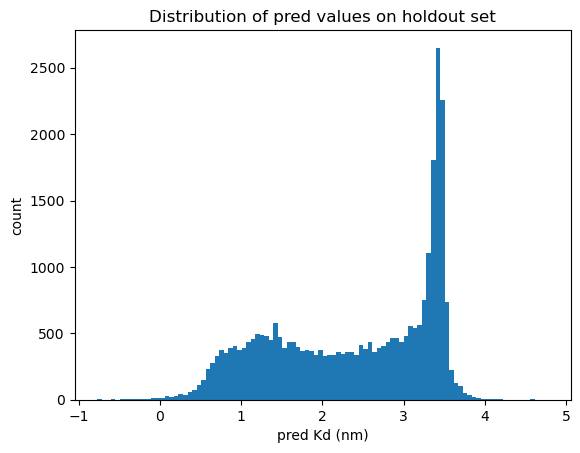

In [10]:
pred_file_path = '../inference_results/preds_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
pred_file_path = '../inference_results/preds_mlp_1714519460.345232.pkl'
true_file_path = '../inference_results/y_mlp_1714519460.3456798.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Dense MLP model

len(preds): 30071
preds[0:10]: [2.4990644454956055, 2.0807547569274902, 2.661569118499756, 2.9562244415283203, 2.1652021408081055, 3.481377124786377, 2.993251323699951, 3.4557700157165527, 2.881880283355713, 2.619324207305908]


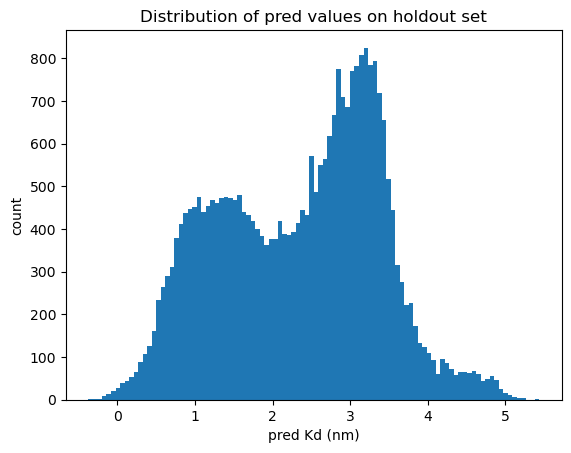

In [11]:
pred_file_path = '../inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

len(preds): 2920 , len(y): 2920
preds[0:10]: [3.0033907890319824, 3.1836142539978027, 3.355527400970459, 3.3417296409606934, 3.392061233520508, 3.1957573890686035, 3.7944135665893555, 2.838082790374756, 3.279926300048828, 3.2691006660461426]
rmse: 1.0595144221365784


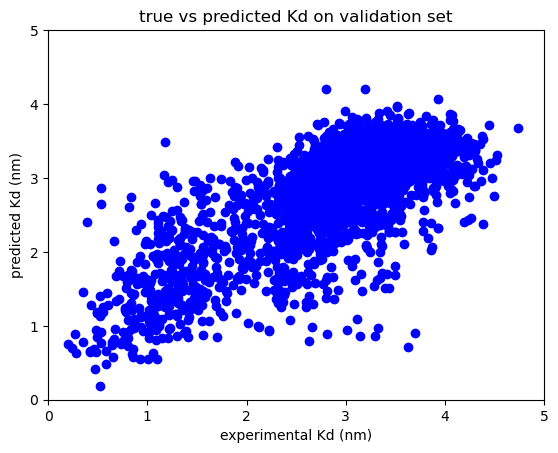

In [12]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_dense_mlp_1714520055.8448465.pkl'
true_file_path = '../inference_results/y_dense_mlp_1714520055.845317.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP

len(preds): 30071
preds[0:10]: [4.056900978088379, 4.795970916748047, 4.684296131134033, 5.02077054977417, 5.141646862030029, 3.3260092735290527, 3.0651400089263916, 3.457963705062866, 2.942023992538452, 2.533543586730957]


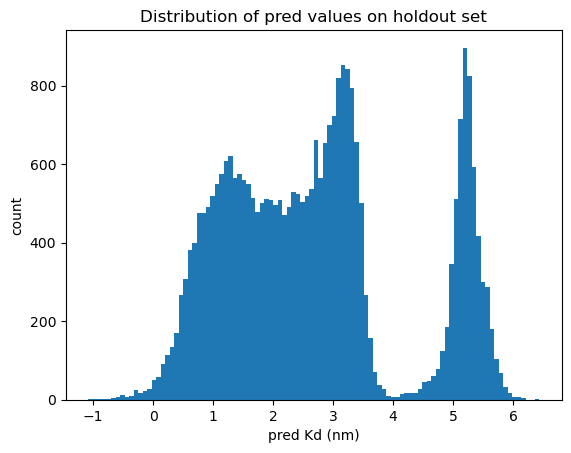

In [13]:
pred_file_path = '../inference_results/preds_residual_mlp_1714622884.672657.pkl'
plot_preds_hist(pred_file_path)

len(preds): 2920 , len(y): 2920
preds[0:10]: [3.136025905609131, 3.1998238563537598, 3.4508180618286133, 3.3688883781433105, 3.346160411834717, 3.2672109603881836, 3.752049446105957, 2.906844139099121, 3.0796353816986084, 3.3185555934906006]
rmse: 1.0513906714147634


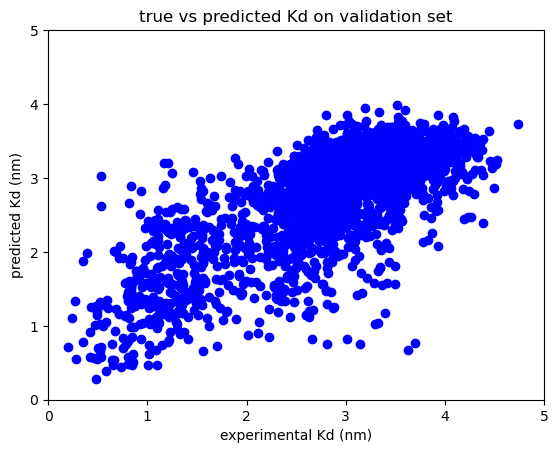

In [14]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_residual_mlp_1714622963.854741.pkl'
true_file_path = '../inference_results/y_residual_mlp_1714622963.855089.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

-------
### Vision Transform Model (VIT)

len(preds): 30071
preds[0:10]: [3.5676686763763428, 3.351707696914673, 3.4523983001708984, 3.335697889328003, 3.553405284881592, 3.5205259323120117, 3.251314878463745, 2.750793695449829, 2.7132608890533447, 2.4794998168945312]


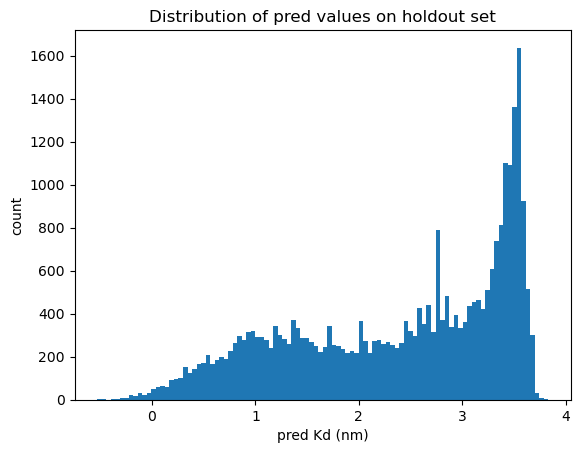

In [15]:
pred_file_path = '../inference_results/preds_vit_1714621857.9278982.pkl'
plot_preds_hist(pred_file_path)

len(preds): 2920 , len(y): 2920
preds[0:10]: [3.3787078857421875, 3.47406268119812, 3.574226140975952, 3.4667465686798096, 3.3287978172302246, 3.5394489765167236, 3.281367063522339, 3.398716926574707, 3.37001371383667, 3.2101476192474365]
rmse: 1.0202079945171236


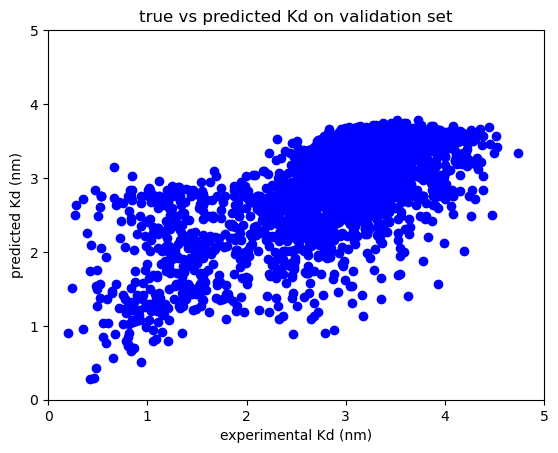

In [16]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_vit_1714622048.243739.pkl'
true_file_path = '../inference_results/y_vit_1714622048.2449658.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

-------
### Vision Transform Model (VIT)  Clean-2 Dataset

len(preds): 30071
preds[0:10]: [2.9505372047424316, 2.9866936206817627, 3.053231954574585, 2.982715129852295, 3.014226198196411, 2.1118593215942383, 2.906425952911377, 2.099045515060425, 2.5775787830352783, 1.9892945289611816]


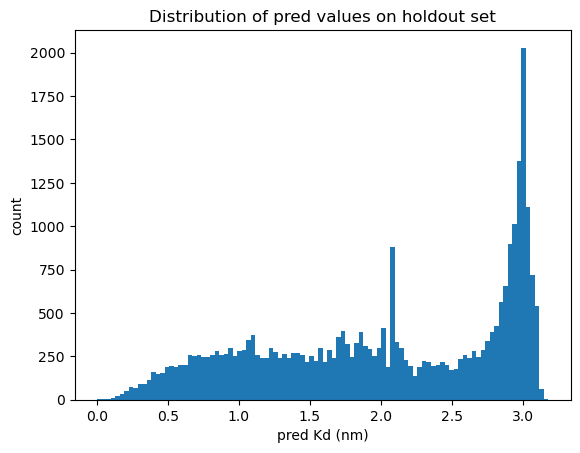

In [6]:
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662361.943635.pkl'
plot_preds_hist(pred_file_path)

len(preds): 1232 , len(y): 1232
preds[0:10]: [3.027970790863037, 3.0822386741638184, 3.0532402992248535, 3.0220894813537598, 2.99692440032959, 3.034878730773926, 2.958885669708252, 2.8357224464416504, 2.9417920112609863, 3.104729652404785]
rmse: 0.9354137259106958


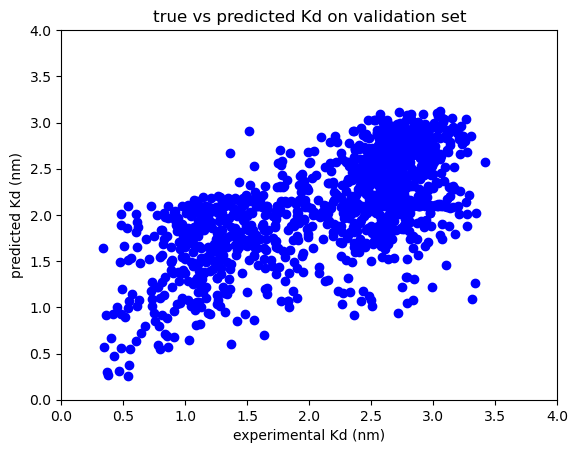

In [10]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit/cleaned-2/preds_vit_1714662684.9658298.pkl'
true_file_path = '../inference_results/vit/cleaned-2/y_vit_1714662684.967206.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

----
### BERT (raw)
i.e. Start with un-pre-trained fine-tune model and train from scratch


In [ ]:
todo in progress....

preds = pk.load(open('./inference/preds_bert_raw.pkl', 'rb'))
print('len(preds):', len(preds))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Histogram of predicted values
plt.hist(preds, bins=100)
plt.xlabel('pred Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of pred values on holdout set')
plt.show()


In [ ]:
# Inference on the validation set to compare actual with predicted values
preds = pk.load(open(???, 'rb'))
y     = pk.load(open(???, 'rb'))
print('len(preds):', len(preds), ', len(y):', len(y))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Calc the root mean squared error
rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
print('rmse:', rmse)

# scatter plot of true vs pred
plt.scatter(y, preds, c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('predicted Kd (nm)')
plt.title('true vs predicted Kd on validation set')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()


----
### BERT (for real)
i.e. Start with BERT pre-trained on OAS dataset, then fine-tuned on scFv training dataset
